<a href="https://colab.research.google.com/github/Aelamin19/Applied-predictive-analytics/blob/main/BigDataPySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA using PySPark for world happiness report dataset

In [ ]:
#installing pyspark

#!pip install pyspark
#from pyspark import SparkContext
#sc = SparkContext()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Happiness_EDA').getOrCreate()

In [ ]:
spark

#combining the datasets into 1

In [ ]:
from pyspark.sql.functions import lit
# Load each dataset into a DataFrame
happiness_data_2015 = spark.read.csv("/content/WHR_2015.csv", header=True, inferSchema=True)
happiness_data_2016 = spark.read.csv("/content/WHR_2016.csv", header=True, inferSchema=True)


# Add a column 'Year' to each DataFrame
happiness_data_2015 = happiness_data_2015.withColumn('Year', lit(2015))
happiness_data_2016 = happiness_data_2016.withColumn('Year', lit(2016))


# Identify common columns
common_columns = set(happiness_data_2015.columns) & set(happiness_data_2016.columns) #& set(happiness_data_2017.columns) & set(happiness_data_2018.columns) & set(happiness_data_2019.columns)

# Ensure all datasets have common columns
for df in [happiness_data_2015, happiness_data_2016]:
    missing_columns = set(common_columns) - set(df.columns)
    for col in missing_columns:
        df = df.withColumn(col, lit(None))

# Union the DataFrames vertically
df_pyspark = happiness_data_2015.select(*common_columns).union(happiness_data_2016.select(*common_columns))#.union(happiness_data_2017.select(*common_columns)).union(happiness_data_2018.select(*common_columns)).union(happiness_data_2019.select(*common_columns))

# Show the combined DataFrame
df_pyspark.show()



+-------+-----------------+-------+-----------------------------+---------------+----------+------------------------+--------------------+--------------------+------------------------+----+--------------+
|Freedom|Dystopia Residual| Family|Trust (Government Corruption)|Happiness Score|Generosity|Economy (GDP per Capita)|             Country|              Region|Health (Life Expectancy)|Year|Happiness Rank|
+-------+-----------------+-------+-----------------------------+---------------+----------+------------------------+--------------------+--------------------+------------------------+----+--------------+
|0.66557|          2.51738|1.34951|                      0.41978|          7.587|   0.29678|                 1.39651|         Switzerland|      Western Europe|                 0.94143|2015|             1|
|0.62877|          2.70201|1.40223|                      0.14145|          7.561|    0.4363|                 1.30232|             Iceland|      Western Europe|                 0.94

#Becoming familiar with the dataset

In [ ]:
#Checking the schema
df_pyspark.printSchema()

root
 |-- Freedom: double (nullable = true)
 |-- Dystopia Residual: double (nullable = true)
 |-- Family: double (nullable = true)
 |-- Trust (Government Corruption): double (nullable = true)
 |-- Happiness Score: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Economy (GDP per Capita): double (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Health (Life Expectancy): double (nullable = true)
 |-- Year: integer (nullable = false)
 |-- Happiness Rank: integer (nullable = true)



In [ ]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [ ]:
df_pyspark.head(5)

[Row(Freedom=0.66557, Dystopia Residual=2.51738, Family=1.34951, Trust (Government Corruption)=0.41978, Happiness Score=7.587, Generosity=0.29678, Economy (GDP per Capita)=1.39651, Country='Switzerland', Region='Western Europe', Health (Life Expectancy)=0.94143, Year=2015, Happiness Rank=1),
 Row(Freedom=0.62877, Dystopia Residual=2.70201, Family=1.40223, Trust (Government Corruption)=0.14145, Happiness Score=7.561, Generosity=0.4363, Economy (GDP per Capita)=1.30232, Country='Iceland', Region='Western Europe', Health (Life Expectancy)=0.94784, Year=2015, Happiness Rank=2),
 Row(Freedom=0.64938, Dystopia Residual=2.49204, Family=1.36058, Trust (Government Corruption)=0.48357, Happiness Score=7.527, Generosity=0.34139, Economy (GDP per Capita)=1.32548, Country='Denmark', Region='Western Europe', Health (Life Expectancy)=0.87464, Year=2015, Happiness Rank=3),
 Row(Freedom=0.66973, Dystopia Residual=2.46531, Family=1.33095, Trust (Government Corruption)=0.36503, Happiness Score=7.522, Gen

In [ ]:
df_pyspark.columns

['Freedom',
 'Dystopia Residual',
 'Family',
 'Trust (Government Corruption)',
 'Happiness Score',
 'Generosity',
 'Economy (GDP per Capita)',
 'Country',
 'Region',
 'Health (Life Expectancy)',
 'Year',
 'Happiness Rank']

replacing the spaces with underscores

In [ ]:
# Get the columns of the DataFrame
columns = df_pyspark.columns

# Rename the columns based on the provided condition
renamed_columns = [(col.split()[0] if len(col.split()) > 2 else col.replace(" ", "_")) for col in columns]

# Apply the column renaming
df_pyspark = df_pyspark.toDF(*renamed_columns)

# Show the DataFrame with renamed columns
df_pyspark.show()

+-------+-----------------+-------+-------+---------------+----------+-------+--------------------+--------------------+-------+----+--------------+
|Freedom|Dystopia_Residual| Family|  Trust|Happiness_Score|Generosity|Economy|             Country|              Region| Health|Year|Happiness_Rank|
+-------+-----------------+-------+-------+---------------+----------+-------+--------------------+--------------------+-------+----+--------------+
|0.66557|          2.51738|1.34951|0.41978|          7.587|   0.29678|1.39651|         Switzerland|      Western Europe|0.94143|2015|             1|
|0.62877|          2.70201|1.40223|0.14145|          7.561|    0.4363|1.30232|             Iceland|      Western Europe|0.94784|2015|             2|
|0.64938|          2.49204|1.36058|0.48357|          7.527|   0.34139|1.32548|             Denmark|      Western Europe|0.87464|2015|             3|
|0.66973|          2.46531|1.33095|0.36503|          7.522|   0.34699|  1.459|              Norway|      W

Lets take a look at how many countries and regions there are

In [ ]:
df_pyspark.select('Country').distinct().count()

164

In [ ]:
df_pyspark.select('Region').distinct().count()

10

In [ ]:
df_pyspark.select('Region').distinct().collect()

[Row(Region='Middle East and Northern Africa'),
 Row(Region='Sub-Saharan Africa'),
 Row(Region='Australia and New Zealand'),
 Row(Region='North America'),
 Row(Region='Southern Asia'),
 Row(Region='Latin America and Caribbean'),
 Row(Region='Western Europe'),
 Row(Region='Central and Eastern Europe'),
 Row(Region='Eastern Asia'),
 Row(Region='Southeastern Asia')]

In [ ]:
df_pyspark.describe().show()

+-------+-------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------------+-------------------+------------------+-----------------+
|summary|            Freedom| Dystopia_Residual|            Family|              Trust|   Happiness_Score|         Generosity|            Economy|    Country|              Region|             Health|              Year|   Happiness_Rank|
+-------+-------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------------+-------------------+------------------+-----------------+
|  count|                315|               315|               315|                315|               315|                315|                315|        315|                 315|                315|               315|              315|
|   mean|0.39989587301587315|2.2120316190476195|0.89

In [ ]:
from pyspark.sql.functions import col

# Get the list of column names
columns = df_pyspark.columns

# Dictionary to store null counts for each column
null_counts = {}

# Calculate null counts for each column
for column in columns:
    null_count = df_pyspark.where(col(column).isNull()).count()
    null_counts[column] = null_count

# Print null counts for each column
for column, count in null_counts.items():
    print("Number of null values in column '{}': {}".format(column, count))


Number of null values in column 'Freedom': 0
Number of null values in column 'Dystopia_Residual': 0
Number of null values in column 'Family': 0
Number of null values in column 'Trust': 0
Number of null values in column 'Happiness_Score': 0
Number of null values in column 'Generosity': 0
Number of null values in column 'Economy': 0
Number of null values in column 'Country': 0
Number of null values in column 'Region': 0
Number of null values in column 'Health': 0
Number of null values in column 'Year': 0
Number of null values in column 'Happiness_Rank': 0


##getting the average happiness ratio for each region

In [ ]:
# Get unique regions
region_lists = df_pyspark.select("Region").distinct().rdd.flatMap(lambda x: x).collect()

# Calculate region-wise happiness ratio
region_happiness_ratio = []
for region in region_lists:
    region_data = df_pyspark.filter(col("Region") == region)
    region_happiness_rate = region_data.agg({"Happiness_Score": "avg"}).collect()[0][0]
    region_happiness_ratio.append(region_happiness_rate)

# Create a DataFrame from the results
from pyspark.sql import Row
data = spark.createDataFrame([Row(region=region, region_happiness_ratio=happiness_ratio)
                              for region, happiness_ratio in zip(region_lists, region_happiness_ratio)])

# Sort the DataFrame by 'region_happiness_ratio' in descending order
sorted_data = data.orderBy(col("region_happiness_ratio").desc())

# Show the sorted DataFrame
sorted_data.show()

+--------------------+----------------------+
|              region|region_happiness_ratio|
+--------------------+----------------------+
|Australia and New...|               7.30425|
|       North America|                7.2635|
|      Western Europe|     6.687642857142857|
|Latin America and...|     6.122282608695652|
|        Eastern Asia|     5.625166666666668|
|Middle East and N...|      5.39674358974359|
|Central and Easte...|     5.351810344827587|
|   Southeastern Asia|     5.328166666666667|
|       Southern Asia|     4.572071428571428|
|  Sub-Saharan Africa|     4.170461538461538|
+--------------------+----------------------+



#Visualisations

##bar chart

<ipython-input-92-21905337aba2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pandas_df['region'], y=pandas_df['region_happiness_ratio'], palette=sns.cubehelix_palette(len(pandas_df['region'])))


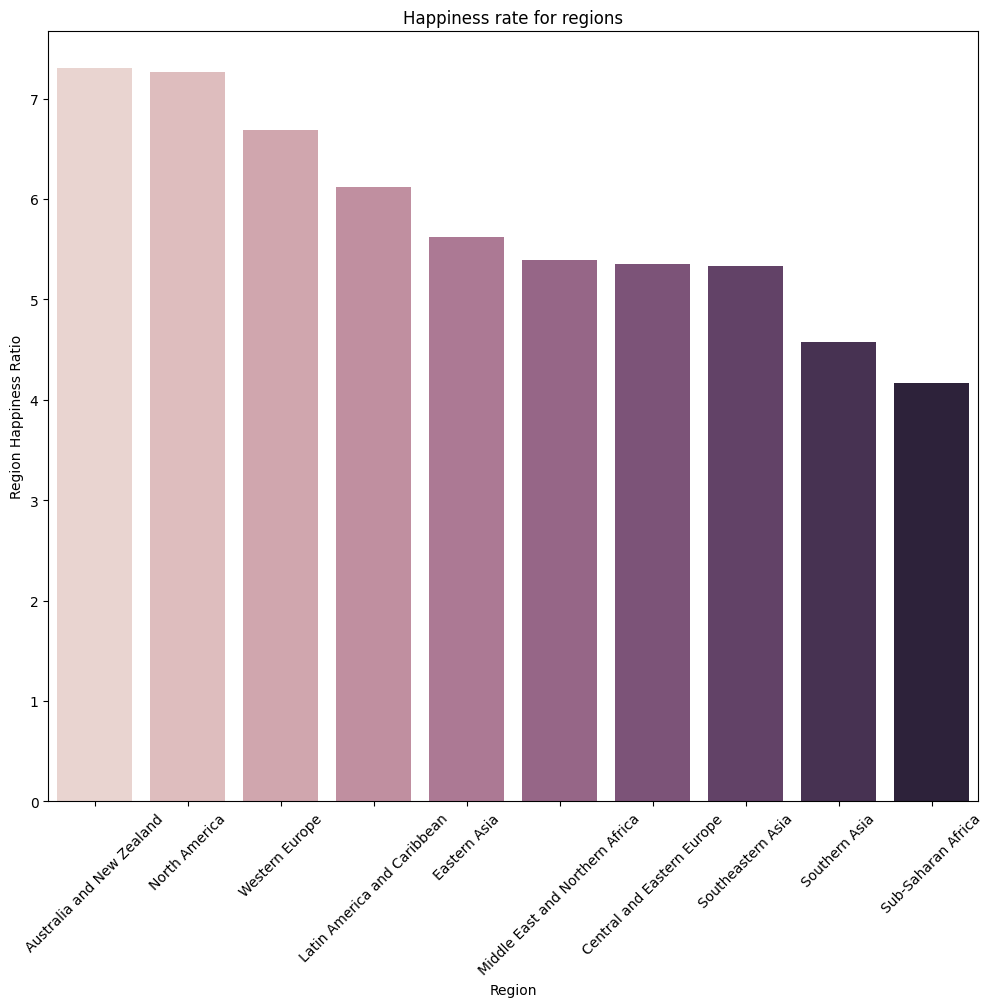

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

pandas_df = sorted_data.toPandas()

# Create the visualization using Matplotlib and Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x=pandas_df['region'], y=pandas_df['region_happiness_ratio'], palette=sns.cubehelix_palette(len(pandas_df['region'])))
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()


#The effect the economy has on happiness

In [ ]:
from pyspark.sql.functions import col, avg
# Get unique regions
region_lists = df_pyspark.select("Region").distinct().rdd.flatMap(lambda x: x).collect()

# Calculate region-wise economy ratio
region_economy_ratio = []
for region in region_lists:
    region_data = df_pyspark.filter(col("Region") == region)
    region_economy_rate = region_data.agg(avg("Economy")).collect()[0][0]
    region_economy_ratio.append(region_economy_rate)

# Create a DataFrame from the results
from pyspark.sql import Row
data_economy = spark.createDataFrame([Row(region=region, region_economy_ratio=economy_ratio)
                                      for region, economy_ratio in zip(region_lists, region_economy_ratio)])

# Sort the DataFrame by 'region_economy_ratio' in ascending order
sorted_data_economy = data_economy.orderBy(col("region_economy_ratio"))

# Show the sorted DataFrame
sorted_data_economy.show()

+--------------------+--------------------+
|              region|region_economy_ratio|
+--------------------+--------------------+
|  Sub-Saharan Africa| 0.42619397435897444|
|       Southern Asia|  0.6105785714285715|
|   Southeastern Asia|  0.8427177777777778|
|Latin America and...|  0.9376473913043478|
|Central and Easte...|  0.9949875862068965|
|Middle East and N...|  1.1022207692307688|
|        Eastern Asia|  1.2145458333333332|
|Australia and New...|           1.3472125|
|      Western Europe|  1.3578257142857144|
|       North America|  1.4172274999999999|
+--------------------+--------------------+



<ipython-input-97-85a998d66632>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data_economy.select('region').rdd.flatMap(lambda x: x).collect(),


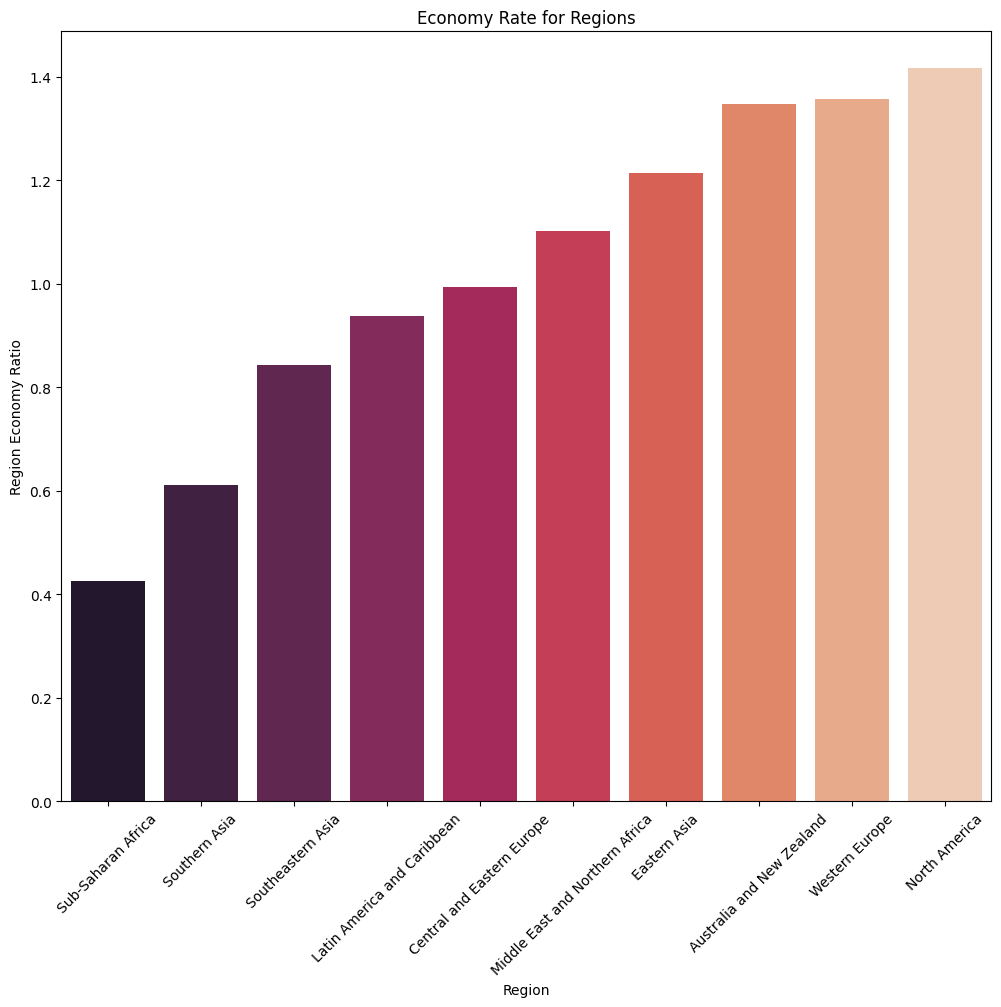

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create a new figure and set the size (12,10)
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot the bar graph using seaborn
sns.barplot(x=sorted_data_economy.select('region').rdd.flatMap(lambda x: x).collect(),
            y=sorted_data_economy.select('region_economy_ratio').rdd.flatMap(lambda x: x).collect(),
            palette="rocket", ax=ax1)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=45)

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy Rate for Regions')

# Display the plot
plt.show()

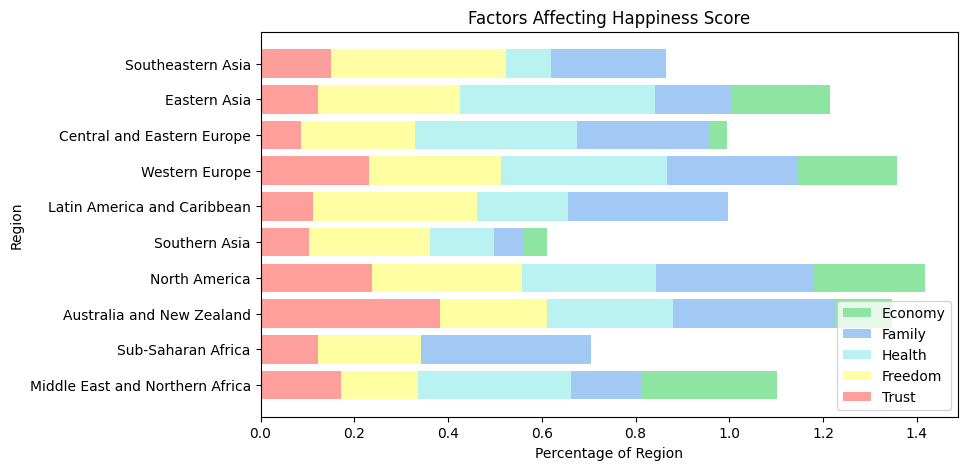

In [ ]:
# Get unique regions
region_lists = df_pyspark.select("Region").distinct().rdd.flatMap(lambda x: x).collect()

# Calculate average scores for each factor by region
share_economy = []
share_family = []
share_health = []
share_freedom = []
share_trust = []
for region in region_lists:
    region_data = df_pyspark.filter(col("Region") == region)
    share_economy.append(region_data.agg(avg("Economy")).collect()[0][0])
    share_family.append(region_data.agg(avg("Family")).collect()[0][0])
    share_health.append(region_data.agg(avg("Health")).collect()[0][0])
    share_freedom.append(region_data.agg(avg("Freedom")).collect()[0][0])
    share_trust.append(region_data.agg(avg("Trust")).collect()[0][0])

# Visualization
plt.figure(figsize=(9, 5))
sns.set_color_codes("pastel")
plt.barh(region_lists, share_economy, color='g', label="Economy")
plt.barh(region_lists, share_family, color='b', label="Family")
plt.barh(region_lists, share_health, color='c', label="Health")
plt.barh(region_lists, share_freedom, color='y', label="Freedom")
plt.barh(region_lists, share_trust, color='r', label="Trust")
plt.legend(loc="lower right", frameon=True)
plt.xlabel('Percentage of Region')
plt.ylabel('Region')
plt.title('Factors Affecting Happiness Score')
plt.show()
